# Homework 3
### Snow Hydrology
### Clinton Alden

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import matplotlib.dates as mdates

### Problem 1: Comparing solar radiation sensors
A common problem in snow energy balance studies is that snow accumulates on the upward pointing radiometers (see image below, compliments of Lapo et al., 2015).

Use the precipitation dataset from Lab 2 to examine both incoming and outgoing radiation measurements during and after times with precipitation. Find a time in the dataset when you think snow covered the radiometer and explain why this occurred.

You may find that skimming the following paper is useful, but it's not necessary. Lapo et al., 2015 Karl Lapo is a graduated, former UW PhD student.



In [59]:
# read in precip data
kettle_ponds_precip = pd.read_csv('../data/kettle_ponds_precip.csv')
kettle_ponds_precip['date'] = pd.to_datetime(kettle_ponds_precip['date'])
kettle_ponds_precip.set_index('date', inplace=True)

# calculate daily precip
kettle_ponds_precip['precip'] = kettle_ponds_precip['acc_prec'].diff()


In [60]:
# read in radiation data
sos_dataset = xr.open_dataset('../data/sos_full_dataset_30min.nc')
sos_rad_data = sos_dataset[[
    'Rsw_in_9m_d',
    'Rsw_out_9m_d',
    'Rlw_in_9m_d',
    'Rlw_out_9m_d'
]].to_dataframe()

(19434.0, 19441.0)

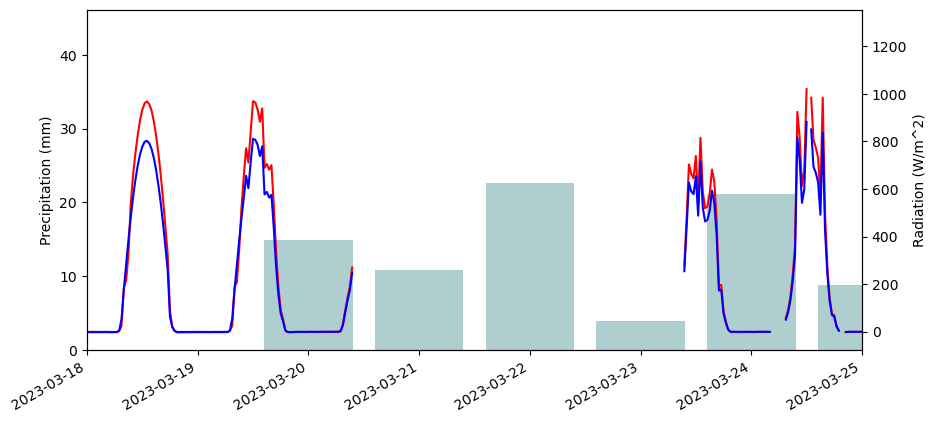

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))

# plot precip data
ax.bar(kettle_ponds_precip.index, kettle_ponds_precip['precip'], label='Daily Precip', color='cadetblue', alpha=0.5)
ax.set_ylabel('Precipitation (mm)')

# plot SWin and SWout from tower D
ax2 = ax.twinx()
ax2.plot(sos_rad_data.index, sos_rad_data['Rsw_in_9m_d'], label='Rsw_in_9m_d', color='red')
ax2.plot(sos_rad_data.index, sos_rad_data['Rsw_out_9m_d'], label='Rsw_out_9m_d', color='blue')
ax2.set_ylabel('Radiation (W/m^2)')

# fix date timestamps
fig.autofmt_xdate()

# subset to March 18 to March 25
ax.set_xlim(pd.Timestamp('2023-03-18'), pd.Timestamp('2023-03-25'))

The plot above shows a period between March 20 and March 23 where it appears the radiometer was snow covered. There is no incoming solar radiation during this period while significant precipitation was occuring.

### Problem 2: Clouds

Identify two periods of variable cloud cover in the dataset, one during nighttime and one during daytime. You can use shortwave radiation measurements to identify what is day/night. Explain why and how you can use both shortwave and longwave measurements to identify variations in cloud cover. Explain what both shortwave and longwave radiation tell you about the cloud cover.

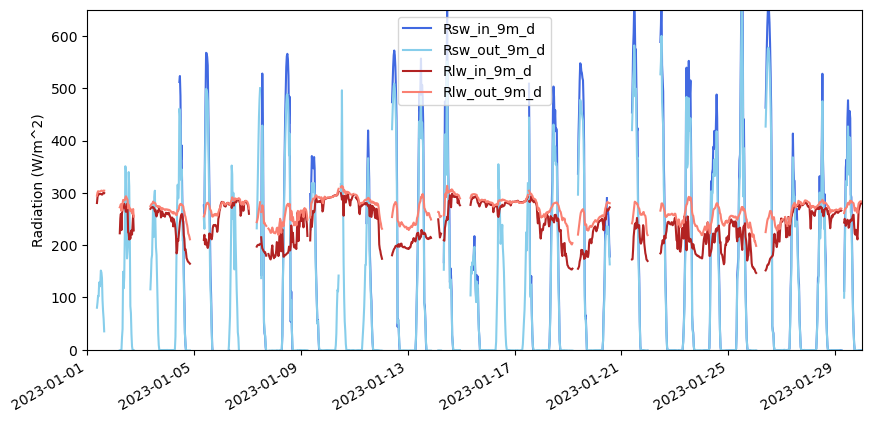

In [74]:
fig, ax = plt.subplots(figsize=(10,5))

# plot SWin and SWout from tower D
ax.plot(sos_rad_data.index, sos_rad_data['Rsw_in_9m_d'], label='Rsw_in_9m_d', color='royalblue', )
ax.plot(sos_rad_data.index, sos_rad_data['Rsw_out_9m_d'], label='Rsw_out_9m_d', color='skyblue')

# plot LWin and LWout from tower D
ax.plot(sos_rad_data.index, sos_rad_data['Rlw_in_9m_d'], label='Rlw_in_9m_d', color='firebrick')
ax.plot(sos_rad_data.index, sos_rad_data['Rlw_out_9m_d'], label='Rlw_out_9m_d', color='salmon')

ax.set_ylabel('Radiation (W/m^2)')
ax.set_ylim(0,650)
ax.legend()

# subset to March 18 to March 25
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-01-30'))

# fix date timestamps
fig.autofmt_xdate()

### Problem 3: Estimating snow surface temperature from outgoing longwave radiation
At Kettle Ponds, a dedicated instrument for measuring surface temperature (an Apogee infrared radiometer) is used to measure surface temperature (see variables Tsurf_c, Tsurf_d, Tsurf_ue, Tsurf_uw). One could also estimate surface temperature using the broadband longwave radiometers (which measure more than just infrared wavelengths, see variable Rlw_out_9m_d). Use broadband longwave radiometer meausrements of outgoing longwave radiation (Rlw_out_9m_d) to estimate snow surface temperature using the Stefan-Boltzmann equation. For 3-7 days during any time in the dataset, plot your estimate of surface temperature along with the Apogee infrared radiometer estimate. Discuss how they differ and why they might differ.

Problem 4: Dust on snow and albedo
The reflectivity of snow, AKA albedo ($\alpha$), is defined

$\alpha = \frac{SW_{out}}{SW_{in}}$

It is understood intuitively to most people in cold climates that snow is brightest right after new snowfall, and darkens as it ages. This is a result both of the rounding and growing of snow grains as well as the "dirtying" of snow through the deposition of atmospheric deposition particulates. In April, 2024, a substantial amount of dust was deposited on our site at Kettle Ponds (see the photo at the top of this page). Calculate and plot albedo during April the first half of April and identify the date on which you think dust was deposited. Explain how you come to this conclusion.



### Problem 5: Snow surface energy balance - Intuition
In Lab3-2, we plotted the average diurnal cycle of the snow surface energy balance (the final plot in that lab). Explain what you observe in this plot (you do not need to recreate the plot in your homework). What do each of the five terms represent? When is each term negative/positive and why?

### Problem 6
On your reading of Warren 2019.

Explain why coarse-grained snow has lower albedo than-grained snow.

